Heart Diseases describe a range of conditions that affect your heart

diseases includes blood vessel diseases such as coronary artery disease, heart rhythm problems(arrhythmia) and heart defects you're born with (congenital heart defects), among others.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

In [3]:
data = pd.read_csv('heart.csv')

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


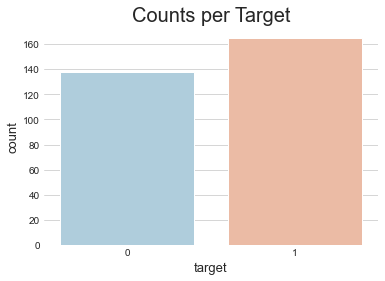

In [51]:
sns.countplot(data.target,palette='RdBu_r')
sns.set_style('whitegrid')
plt.title('Counts per Target',fontsize=20)
plt.xlabel('target',fontsize=13)
plt.ylabel('count',fontsize=13)
plt.show()

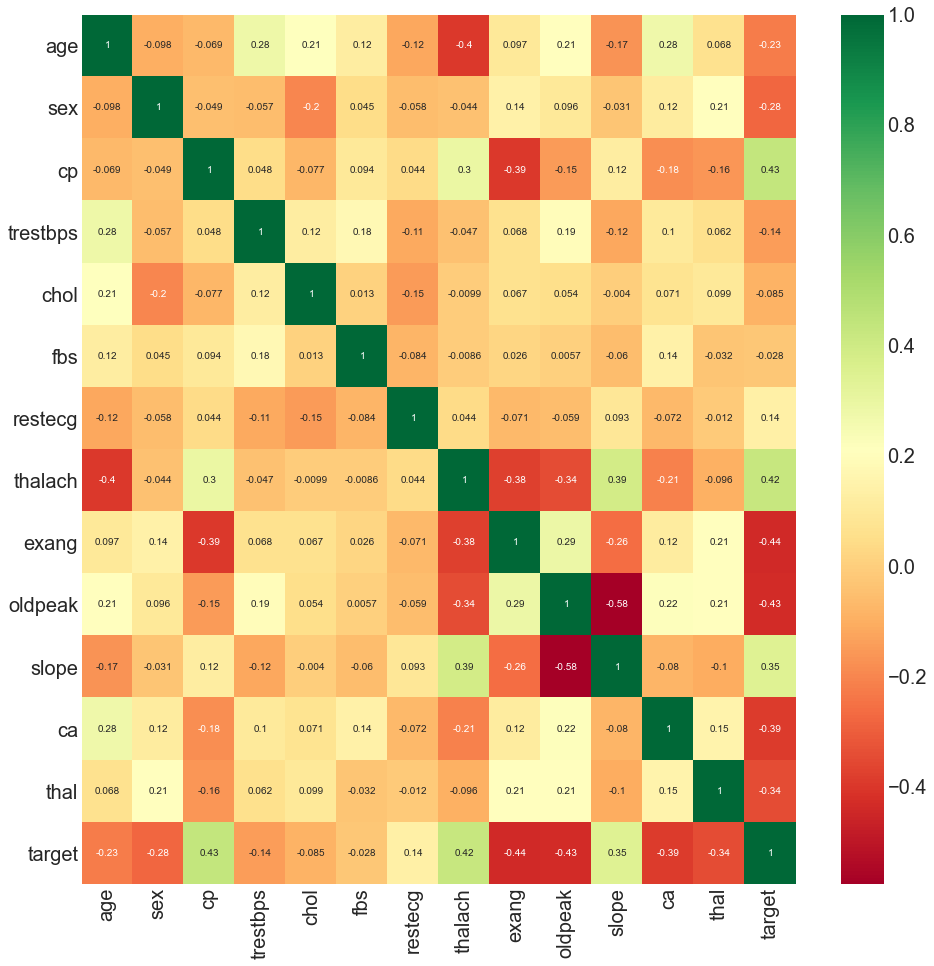

In [48]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.rc('xtick', labelsize=10)    
plt.rc('ytick', labelsize=10)  
plt.show()

In [53]:
data[::4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [69]:
category_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
dataset = pd.get_dummies(data,columns=category_cols)

In [71]:
scaler = StandardScaler()
cols_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[cols_to_scale] = scaler.fit_transform(dataset[cols_to_scale])

In [77]:
y = dataset['target']
x = dataset.drop(columns='target')

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=17)

In [137]:
knn_scores = []
for k in range(1,21):
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc,x_train,y_train,cv=9)
    knn_scores.append(score.mean())

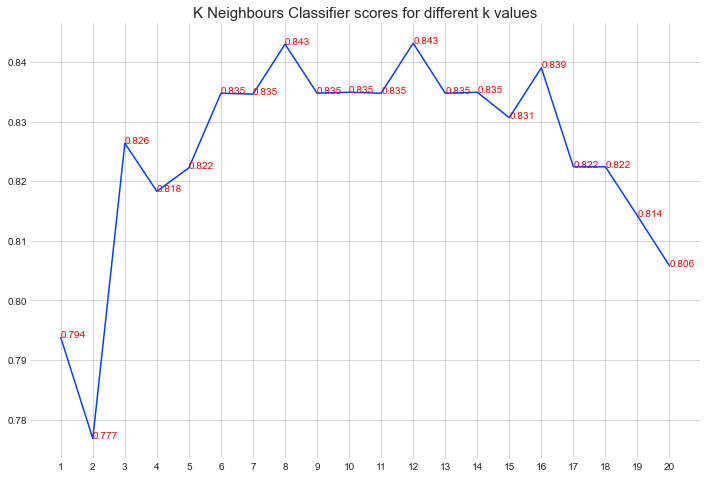

In [138]:
plt.figure(figsize=(12,8))
sns.lineplot([k for k in range(1,21)],knn_scores)
sns.set_style('whitegrid')
plt.xticks([i for i in range(1,21)])
for i in range(1,21):
    plt.text(i,knn_scores[i-1],'{:.3f}'.format(knn_scores[i-1]),color='red')
plt.title('K Neighbours Classifier scores for different k values',fontsize=15)    
plt.show()

In [141]:
knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(x_train,y_train)
print('train score : ',knc.score(x_train,y_train))
print(' test score : ',knc.score(x_test,y_test))

train score :  0.8429752066115702
 test score :  0.8524590163934426


In [145]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=8,random_state=17)
rfc.fit(x_train,y_train)
print('train score : ',rfc.score(x_train,y_train))
print(' test score : ',rfc.score(x_test,y_test))

train score :  0.9958677685950413
 test score :  0.7868852459016393


In [158]:
params = {'n_estimators':range(4,13),
          'max_depth':range(2,10)}
search = GridSearchCV(RandomForestClassifier(),param_grid=params,scoring='accuracy',cv=7)
search.fit(x,y)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10),
                         'n_estimators': range(4, 13)},
             scoring='accuracy')

In [161]:
print('train score : ',search.best_estimator_.score(x_train,y_train))
print(' test score : ',search.best_estimator_.score(x_test,y_test))

train score :  0.8347107438016529
 test score :  0.8524590163934426


In [165]:
rf_clf = search.best_estimator_

In [168]:
v_clf = VotingClassifier(estimators=[
    ('forest',rf_clf),('knc',knc)
],voting='soft')
v_clf.fit(x_train,y_train)
print('train score : ',v_clf.score(x_train,y_train))
print(' test score : ',v_clf.score(x_test,y_test))

train score :  0.859504132231405
 test score :  0.819672131147541
